In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

!pip install flaml
!pip install autoviz
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.6/205.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: panel
    Found existing installation: panel 0.13.1
    Uninstalling panel-0.13.1:
      Successfully uninstalled panel-0.13.1
  Attempting uninstall: holoviews
    Found existing installation: holoviews 1.15.0
    Uninstalling holoviews-1.15.0:
      Successfully uninstalled holoviews-1.15.0
/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/tra

In [2]:
train=pd.read_csv('../input/tabular-playground-series-sep-2022/train.csv')
test=pd.read_csv('../input/tabular-playground-series-sep-2022/test.csv')
sample=pd.read_csv('../input/tabular-playground-series-sep-2022/sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   row_id   17520 non-null  int64 
 1   date     17520 non-null  object
 2   country  17520 non-null  object
 3   store    17520 non-null  object
 4   product  17520 non-null  object
dtypes: int64(1), object(4)
memory usage: 684.5+ KB


In [5]:
train.drop('row_id',axis=1,inplace=True)
test.drop('row_id',axis=1,inplace=True)

In [6]:
train.country.unique()

array(['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain'],
      dtype=object)

In [7]:
train.nunique()

date        1461
country        6
store          2
product        4
num_sold     699
dtype: int64

In [8]:
train.groupby('country').mean().sort_values('num_sold')

,num_sold
country,
Poland,114.779689
Spain,171.392710
Italy,188.320671
France,214.948580
Belgium,237.940623
Germany,238.399641


In [9]:
train.store.unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [10]:
cat_cols=[c for c in train.columns if train[c].dtype in ['object']]

In [11]:
cat_cols

['date', 'country', 'store', 'product']

In [12]:
train['product'].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

In [13]:
train['country'].value_counts()

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

In [14]:
train['store'].value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

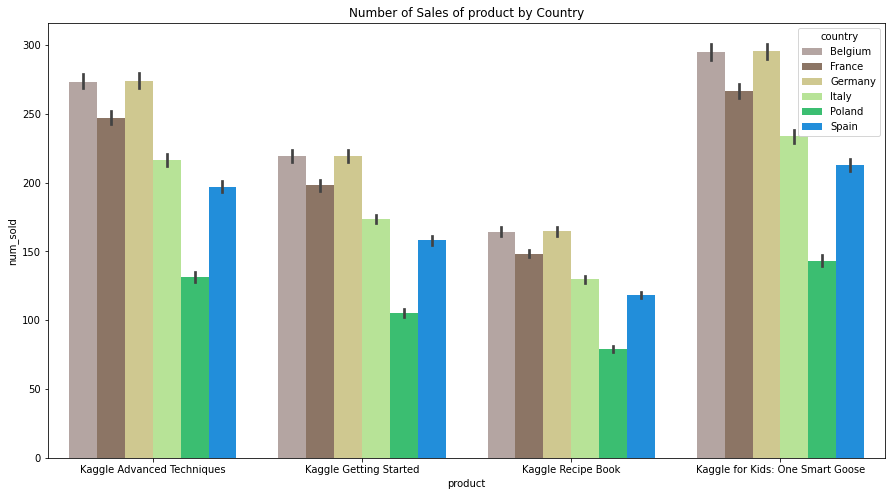

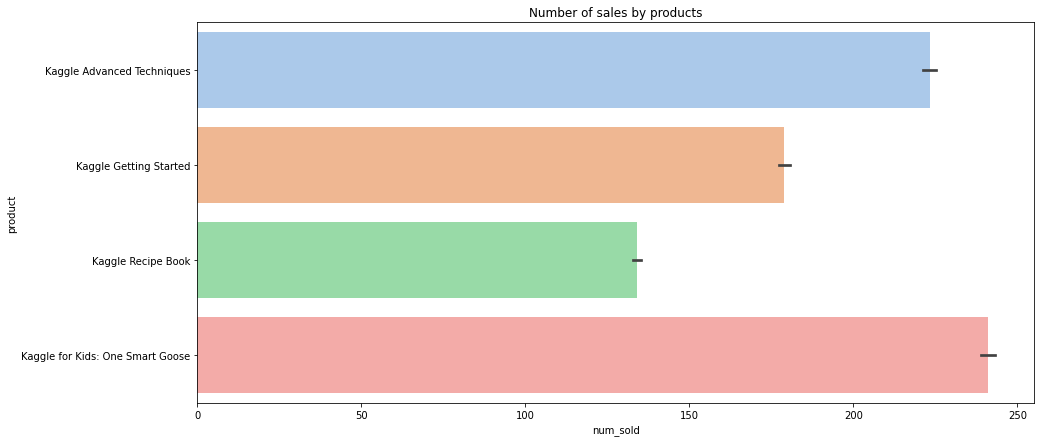

In [15]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=train, x='product', y='num_sold', hue='country',palette = 'terrain_r')
plt.title("Number of Sales of product by Country")
plt.show()

print()

plt.figure(figsize= (15, 7))
sns.barplot(x='num_sold', y='product', palette= 'pastel',data = train)
plt.title('Number of sales by products')
plt.show()

In [16]:
df_train=train.drop('date',axis=1)
df_train['year'] = pd.DatetimeIndex(train['date']).year
df_train['month'] = pd.DatetimeIndex(train['date']).month
df_train['day'] = pd.DatetimeIndex(train['date']).day


In [17]:
df_test=test.drop('date',axis=1)
df_test['year'] = pd.DatetimeIndex(test['date']).year
df_test['month'] = pd.DatetimeIndex(test['date']).month
df_test['day'] = pd.DatetimeIndex(test['date']).day


In [18]:
df_train

,country,store,product,num_sold,year,month,day
0,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1
1,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1
2,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,1
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,1
4,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,1
...,...,...,...,...,...,...,...
70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,2020,12,31
70124,Spain,KaggleRama,Kaggle Advanced Techniques,215,2020,12,31
70125,Spain,KaggleRama,Kaggle Getting Started,158,2020,12,31
70126,Spain,KaggleRama,Kaggle Recipe Book,135,2020,12,31


In [19]:
def target_encoding(data, column, target):
    
    grouped = data[[column,target]].groupby(column,as_index=False).mean()
    empty_dict = {}
    for i in range(len(grouped)):
        empty_dict[grouped.iloc[i,0]]=grouped.iloc[i,1]
    data[column]=data[column].map(lambda x: empty_dict[x])
    
    return data

In [20]:
from category_encoders import TargetEncoder

for col in df_train.select_dtypes(include='O').columns:
    te=TargetEncoder()
    df_train[col]=te.fit_transform(df_train[col],df_train.num_sold)

/opt/conda/lib/python3.7/site-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [21]:
df_train.tail()

,country,store,product,num_sold,year,month,day
70123,171.39271,288.536790,240.989562,614,2020,12,31
70124,171.39271,100.057181,223.243783,215,2020,12,31
70125,171.39271,100.057181,178.924424,158,2020,12,31
70126,171.39271,100.057181,134.030173,135,2020,12,31
70127,171.39271,100.057181,240.989562,202,2020,12,31


In [22]:
df_test['product']=df_test['product'].map({'Kaggle Advanced Techniques':223.243783,
                                          'Kaggle Getting Started':178.924424,
                                          'Kaggle Recipe Book':134.030173,
                                          'Kaggle for Kids: One Smart Goose':240.989562})

In [23]:
df_test['store']=df_test['store'].map({'KaggleMart':288.536790,
                                       'KaggleRama':100.057181})

In [24]:
df_test['country']=df_test['country'].map({'Belgium':237.940623,
                                           'France':214.948580,
                                           'Germany':238.399641,
                                           'Italy':188.320671,
                                           'Poland':114.779689,
                                           'Spain':171.392710})

In [25]:
df_test

,country,store,product,year,month,day
0,237.940623,288.536790,223.243783,2021,1,1
1,237.940623,288.536790,178.924424,2021,1,1
2,237.940623,288.536790,134.030173,2021,1,1
3,237.940623,288.536790,240.989562,2021,1,1
4,237.940623,100.057181,223.243783,2021,1,1
...,...,...,...,...,...,...
17515,171.392710,288.536790,240.989562,2021,12,31
17516,171.392710,100.057181,223.243783,2021,12,31
17517,171.392710,100.057181,178.924424,2021,12,31
17518,171.392710,100.057181,134.030173,2021,12,31


In [26]:
corr_matrix = df_train.corr()
corr_matrix['num_sold'].sort_values(ascending=False)

num_sold    1.000000
store       0.742672
country     0.339869
product     0.326988
year        0.100914
day         0.007803
month       0.001004
Name: num_sold, dtype: float64

<AxesSubplot:>

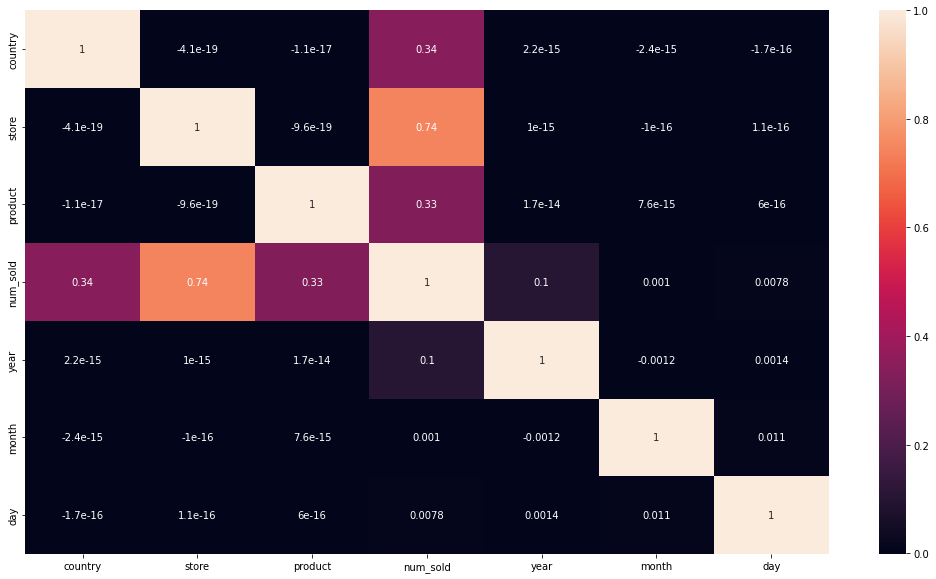

In [27]:
plt.subplots(figsize=(18,10))
sns.heatmap(df_train.corr(),annot=True)

In [28]:
X=df_train.drop('num_sold',axis=1)
y=df_train['num_sold']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [30]:
from flaml import AutoML
automl = AutoML()

In [31]:
automl.fit(X_train, y_train, task="regression",metric='mape',time_budget=900)


[flaml.automl: 09-05 05:41:14] {2565} INFO - task = regression
[flaml.automl: 09-05 05:41:14] {2567} INFO - Data split method: uniform
[flaml.automl: 09-05 05:41:14] {2570} INFO - Evaluation method: cv
[flaml.automl: 09-05 05:41:14] {2689} INFO - Minimizing error metric: mape
[flaml.automl: 09-05 05:41:15] {2831} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 09-05 05:41:15] {3133} INFO - iteration 0, current learner lgbm
[flaml.automl: 09-05 05:41:15] {3267} INFO - Estimated sufficient time budget=3720s. Estimated necessary time budget=32s.
[flaml.automl: 09-05 05:41:15] {3319} INFO -  at 0.7s,	estimator lgbm's best error=0.6684,	best estimator lgbm's best error=0.6684
[flaml.automl: 09-05 05:41:15] {3133} INFO - iteration 1, current learner lgbm
[flaml.automl: 09-05 05:41:15] {3319} INFO -  at 1.0s,	estimator lgbm's best error=0.6684,	best estimator lgbm's best error=0.6684
[flaml.automl: 09-05 05:41:15] 

In [32]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best mape on validation data: {0:.4g}'.format(automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 807, 'max_leaves': 2016, 'min_child_weight': 13.621110149778742, 'learning_rate': 0.06905730346178718, 'subsample': 0.8809985595678514, 'colsample_bylevel': 0.658222851052983, 'colsample_bytree': 0.667965547844673, 'reg_alpha': 0.14341726874717062, 'reg_lambda': 0.3288255602213456}
Best mape on validation data: 0.05858
Training duration of best run: 19.78 s


In [33]:
from flaml.ml import sklearn_metric_loss_score
print('train mape', '=', sklearn_metric_loss_score('mape', automl.predict(X_train), y_train))
print(' test mape', '=', sklearn_metric_loss_score('mape', automl.predict(X_test), y_test))

train mape = 0.04272126049216162
 test mape = 0.056976513440386116


In [34]:
y_pred = automl.predict(df_test)

In [35]:
automl.score(X_train,y_train)

0.9931357468949278

In [36]:
y_test_pred=automl.predict(X_test)

In [37]:
automl.score(X_test,y_test_pred)

1.0

In [38]:
automl.score(df_test,y_pred)

1.0

In [39]:
sample['num_sold'] = y_pred
sample.to_csv("submission.csv", index=False)
sample

,row_id,num_sold
0,70128,455.885498
1,70129,382.636597
2,70130,325.592621
3,70131,532.578125
4,70132,151.522888
...,...,...
17515,87643,614.156494
17516,87644,204.035187
17517,87645,159.579880
17518,87646,141.523468
